## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Фаик Карим Яссерович
##### Группа:   НФИбд-02-21


### Вариант №_17_

1) Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder). 

In [1]:
# данные из репозитария UCI
url = \
    "https://archive.ics.uci.edu/dataset/28/japanese+credit+screening"

2.	Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# URL к файлу с данными
url = 'https://archive.ics.uci.edu/static/public/28/data.csv'

data = pd.read_csv( url, header=None )
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
1,b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
2,a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
3,a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
4,b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
687,a,22.67,0.75,u,g,c,v,2,f,t,02,t,g,00200,394,-
688,a,25.25,13.5,y,p,ff,ff,2,f,t,01,t,g,00200,1,-
689,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [4]:
print(data.head())

   0      1     2   3   4   5   6     7   8    9    10   11   12     13   14  \
0  A1     A2    A3  A4  A5  A6  A7    A8  A9  A10  A11  A12  A13    A14  A15   
1   b  30.83     0   u   g   w   v  1.25   t    t   01    f    g  00202    0   
2   a  58.67  4.46   u   g   q   h  3.04   t    t   06    f    g  00043  560   
3   a  24.50   0.5   u   g   q   h   1.5   t    f    0    f    g  00280  824   
4   b  27.83  1.54   u   g   w   v  3.75   t    t   05    t    g  00100    3   

    15  
0  A16  
1    +  
2    +  
3    +  
4    +  


In [5]:
print(data.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [6]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
data.fillna(data.median(), inplace=True)
data = data.dropna(axis=1, how='all')
data

,1,2,7,10,13,14
0,28.46,2.750,1.00,0.0,160.0,5.0
1,30.83,0.000,1.25,1.0,202.0,0.0
2,58.67,4.460,3.04,6.0,43.0,560.0
3,24.50,0.500,1.50,0.0,280.0,824.0
4,27.83,1.540,3.75,5.0,100.0,3.0
...,...,...,...,...,...,...
686,21.08,10.085,1.25,0.0,260.0,0.0
687,22.67,0.750,2.00,2.0,200.0,394.0
688,25.25,13.500,2.00,1.0,200.0,1.0
689,17.92,0.205,0.04,0.0,280.0,750.0


3.	Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.

In [7]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

class_column = data.columns[-1]
print(f"Столбец с меткой класса: {class_column}")


unique_values = data[class_column].unique()
num_unique_values = len(unique_values)
print(f"Количество уникальных значений в метке класса: {num_unique_values}")

# Если уникальных значений больше 10, выполняем дискретизацию
if num_unique_values > 10:
    print("Выполняется дискретизация метки класса.")
    bins = 5 
    data[class_column] = pd.cut(data[class_column], bins=bins, labels=False, include_lowest=True)
    print("Примеры после дискретизации:")
    print(data[class_column].head())
else:
    print("Количество уникальных значений в метке класса меньше или равно 10. Дискретизация не требуется.")

Столбец с меткой класса: 14
Количество уникальных значений в метке класса: 240
Выполняется дискретизация метки класса.
Примеры после дискретизации:
0    0
1    0
2    0
3    0
4    0
Name: 14, dtype: int64


C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_28832\3623041415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = pd.to_numeric(data[column], errors='coerce')
C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_28832\3623041415.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[class_column] = pd.cut(data[class_column], bins=bins, labels=False, include_lowest=True)


4.	При помощи класса SelectKBest библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра score_func значения chi2 или f_classif.

In [8]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
X = data.drop(columns=[data.columns[-1]])
y = data[data.columns[-1]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = SimpleImputer(strategy='median') 
X_scaled = imputer.fit_transform(X_scaled) 

selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X_scaled, y) 

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print(f"Два наиболее выраженных признака: {list(selected_features)}")

Два наиболее выраженных признака: [2, 13]


5.	Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map).

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

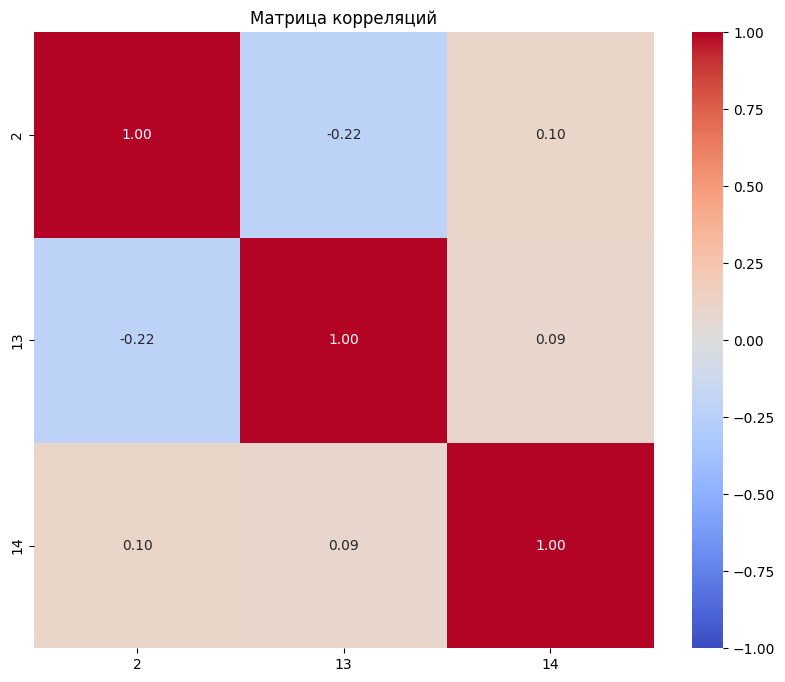

In [11]:
selected_data = X[selected_features].copy()
selected_data[class_column] = y.reset_index(drop=True)

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляций')
plt.show()

6.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

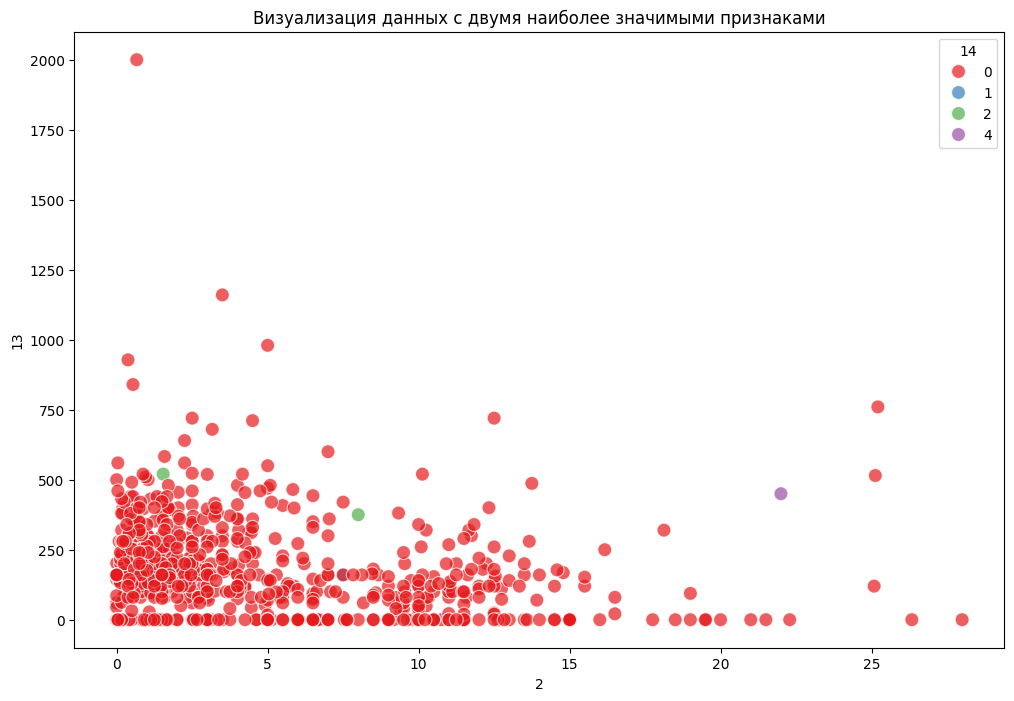

In [12]:
selected_data = X[selected_features].copy()
selected_data[class_column] = y.reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=selected_data, x=selected_features[0], y=selected_features[1], hue=class_column, palette='Set1', s=100, alpha=0.7)

plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Визуализация данных с двумя наиболее значимыми признаками')
plt.legend(title=class_column)

plt.show()

7.	Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 97.5%.

In [13]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


imputer = SimpleImputer(strategy='median')
X_scaled = imputer.fit_transform(X_scaled) 

# Применение PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Нахождение числа компонент, которые объясняют не менее 97.5% дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Находим количество компонент для объяснения не менее 97.5% дисперсии
n_components = (cumulative_variance_ratio >= 0.975).argmax() + 1

print(f"Размерность PCA для объяснения не менее 97.5% дисперсии: {n_components}")

Размерность PCA для объяснения не менее 97.5% дисперсии: 5


8.	Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

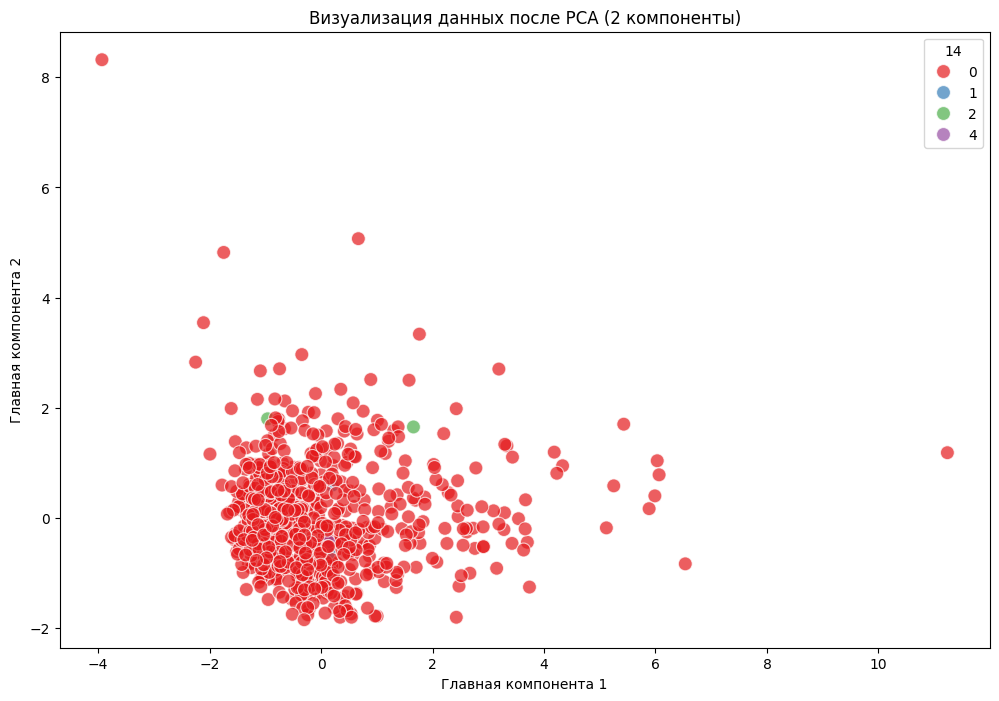

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создание DataFrame для визуализации
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df[class_column] = y.reset_index(drop=True)

# Визуализация данных
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=class_column, palette='Set1', s=100, alpha=0.7)

# Подписи осей и заголовок
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация данных после PCA (2 компоненты)')
plt.legend(title=class_column)

plt.show()